In [1]:
# Preamble
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.metrics import confusion_matrix, brier_score_loss
from sklearn.neighbors import KernelDensity

from utils import load_probs

kde = KernelDensity(kernel='gaussian', bandwidth=0.2)

df_raw = pd.read_pickle('results.pkl')
actual = df_raw.actual.copy()
preds = df_raw.xs('Prediction', level='Method', axis=1)
probs = df_raw.xs('Probability', level='Method', axis=1)

probs.head()

Classifier,LogisticRegression,GaussianNB,LinearSVC,RandomForestClassifier,SGDClassifier,KNeighborsClassifier
0,0.979908,1.0,0.627873,1.0,0.626272,1.0
1,0.968832,1.0,0.574250,1.0,0.631219,1.0
2,0.972728,1.0,0.578030,1.0,0.629980,1.0
3,0.999986,1.0,0.775335,1.0,0.747994,1.0
4,0.815760,1.0,0.574944,1.0,0.549328,1.0


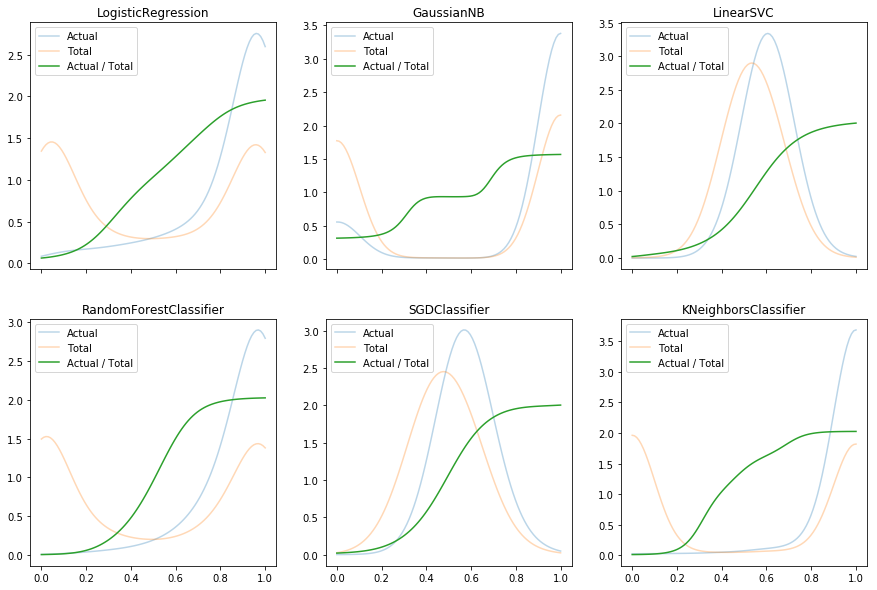

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(15, 10))
axes = tuple(axes.flat)

for ax, (label, probs_) in zip(axes, probs.iteritems()):
    probs_of_actuals = probs_[actual][:, None]
    total_probs = probs_[:, None]
    kde_actual = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(probs_of_actuals)
    kde_total = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(total_probs)
    x_axis = np.linspace(0, 1, 100)[:, None]
    logdens_actual = kde_actual.score_samples(x_axis)
    logdens_total = kde_total.score_samples(x_axis)
    ax.plot(x_axis.ravel(), np.exp(logdens_actual), alpha=0.3, label='Actual')
    ax.plot(x_axis.ravel(), np.exp(logdens_total), alpha=0.3, label='Total')
    ax.plot(x_axis.ravel(), np.exp(logdens_actual) / np.exp(logdens_total), label='Actual / Total')
    ax.legend()
    ax.set_title(label)
    
plt.show()